In [1]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)

In [2]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
import gensim
from gensim.models import LdaMulticore
from gensim.models import LsiModel
import pyLDAvis.gensim
from gensim import corpora
import pandas as pd
import matplotlib.pyplot as plt
from gensim.models.coherencemodel import CoherenceModel

In [3]:
zero_to_one = open('/Users/saadkn/Desktop/zero_one.txt').read()

In [4]:
thiel = re.sub(r'\d+', '', zero_to_one.lower()) #gets rid of digits and makes lowercase
thiel = re.sub(r'[^\w\s]','', thiel) #appropriates punctuation
thiel = thiel.strip() #strips new line character

In [5]:
tokens = word_tokenize(thiel)

In [6]:
stop = set(stopwords.words('english')) # download stopwords

no_stop = [word for word in tokens if (word not in stop)] 

lemmatizer = WordNetLemmatizer() # create lemmatization object
lemmatized_words = [lemmatizer.lemmatize(w) for w in no_stop] #lemmatize with no stopwords

In [7]:
common_words = Counter([w for w in lemmatized_words]).most_common()

# print top 10 most common words
common_words[:20]

[('company', 281),
 ('people', 219),
 ('even', 137),
 ('one', 135),
 ('business', 133),
 ('world', 125),
 ('new', 112),
 ('market', 112),
 ('future', 111),
 ('make', 103),
 ('every', 101),
 ('work', 96),
 ('would', 95),
 ('product', 94),
 ('year', 87),
 ('time', 83),
 ('first', 82),
 ('thing', 79),
 ('today', 78),
 ('like', 78)]

## Most Common Words

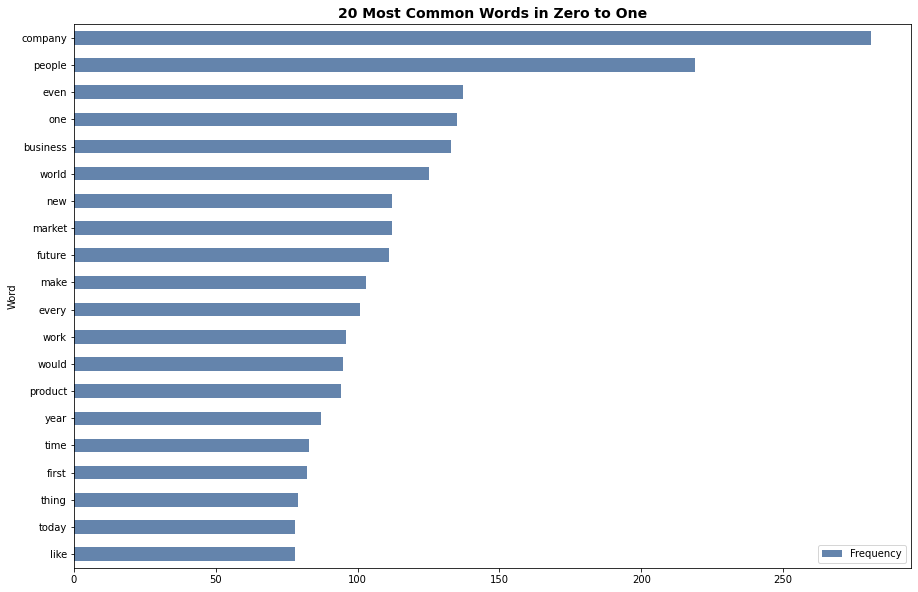

In [8]:
word_list = []
count = []
for word in common_words[:20]:
    word_list.append(word[0])
    count.append(word[1])

df = pd.DataFrame(
    {'Word': word_list,
     'Frequency': count,
    })


fig, ax = plt.subplots(figsize=(15, 10))
ax.grid(False)

# Plot horizontal bar graph
df.sort_values(by='Frequency').plot.barh( x ='Word',
                      y = 'Frequency',
                      ax = ax,
                      color = '#6484ac')


ax.set_title("20 Most Common Words in Zero to One", fontweight = "bold", size = 14)

plt.show(fig)
# fig.savefig('./Most Common Words.png')   # save the figure to file
plt.close(fig)

## Word Cloud

In [9]:
all_words = " ".join(lemmatized_words)

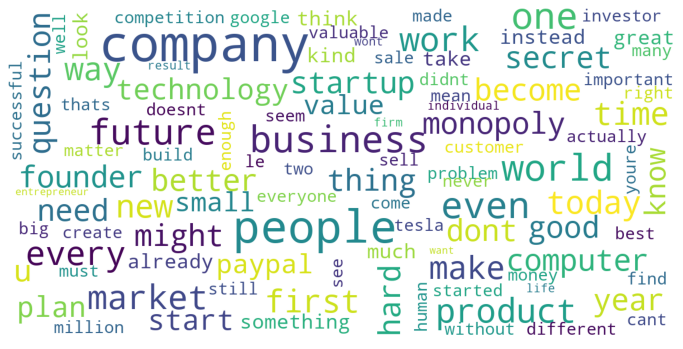

In [10]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

wordcloud = WordCloud(
    background_color = 'white',
    stopwords = stopwords,
    max_words = 100,
    max_font_size = 30,
    scale = 3,
    random_state = 1)

wordcloud = wordcloud.generate(all_words)
fig = plt.figure(1, figsize = (12, 12))
plt.axis('off')

# wordcloud.to_file('./wcloud.png')

plt.imshow(wordcloud)
plt.show()

## Bigrams

In [11]:
bow_format = [all_words]

In [12]:
vec = CountVectorizer(ngram_range = (2, 2)).fit(bow_format)
bag_of_words = vec.transform(bow_format)
sum_words = bag_of_words.sum(axis = 0) 
words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)

print(words_freq[:10])

[('power law', 21), ('silicon valley', 20), ('new technology', 17), ('cleantech company', 16), ('people dont', 12), ('look like', 11), ('cash flow', 11), ('new thing', 10), ('create new', 10), ('everyone else', 10)]


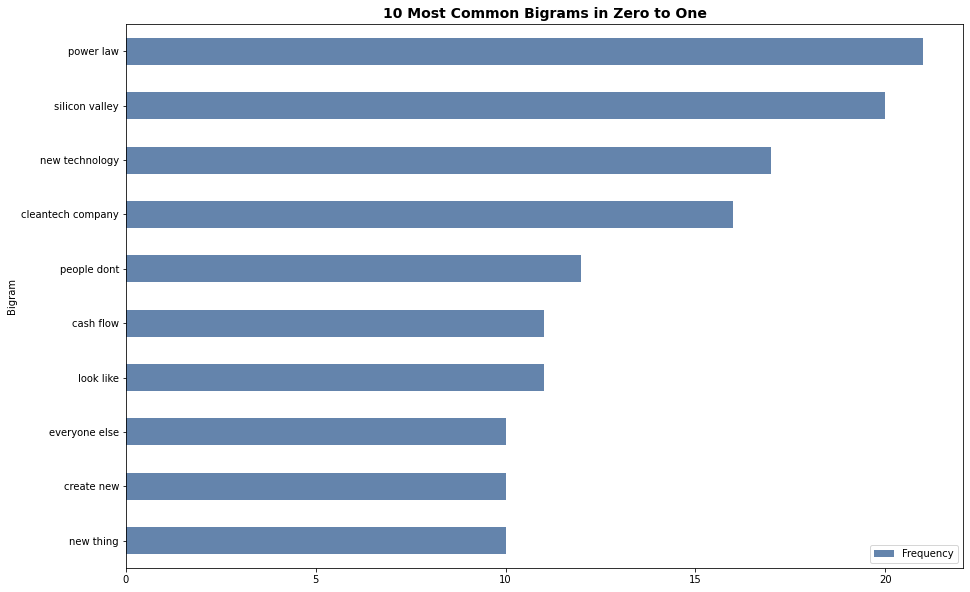

In [13]:
bigrams = []
bigram_count = []
for word in words_freq[:10]:
    bigrams.append(word[0])
    bigram_count.append(word[1])

df = pd.DataFrame(
    {'Bigram': bigrams,
     'Frequency': bigram_count,
    })


fig, ax = plt.subplots(figsize=(15, 10))
ax.locator_params(integer=True)
# Plot horizontal bar graph
df.sort_values(by = 'Frequency').plot.barh( x = 'Bigram',
                      y = 'Frequency',
                      ax = ax,
                      color = '#6484ac')

ax.grid(False)

ax.set_title("10 Most Common Bigrams in Zero to One", fontweight = "bold", size = 14)

plt.show(fig)
# fig.savefig('./Top Bigrams.png')   # save the figure to file
plt.close(fig)

## Named Entity Recognition tagging for company

In [14]:
sent = nltk.word_tokenize(zero_to_one)

In [15]:
import spacy
nlp = spacy.load("en_core_web_sm")

doc = nlp(" ".join(sent))

In [16]:
is_org = [x.text for x in doc.ents if x.label_ == "ORG"]

common_orgs = Counter(is_org).most_common(20)
common_orgs

[('Apple', 25),
 ('eBay', 16),
 ('Microsoft', 15),
 ('Amazon', 12),
 ('Google', 11),
 ('PayPal', 9),
 ('DMV', 8),
 ('Hughes', 8),
 ('Stanford', 7),
 ('Cleantech', 7),
 ('iPhone', 5),
 ('Informix', 5),
 ('Founders Fund', 5),
 ('HP', 5),
 ('Better Place', 5),
 ('Oracle', 4),
 ('Palantir', 4),
 ('FBI', 4),
 ('Tesla', 4),
 ('Fed', 3)]

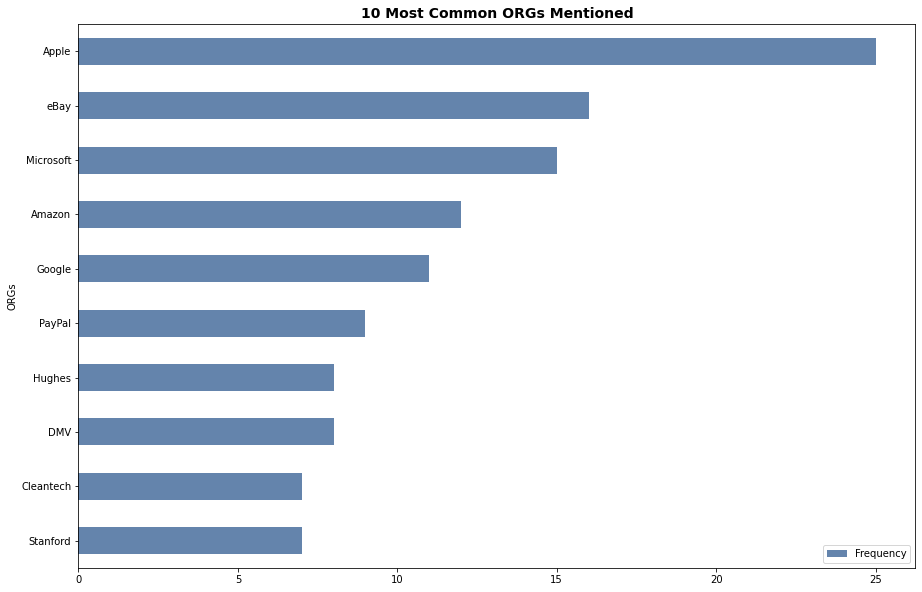

In [17]:
organizations = []
org_count = []
for i in common_orgs[:10]:
    organizations.append(i[0])
    org_count.append(i[1])

df = pd.DataFrame(
    {'ORGs': organizations,
     'Frequency': org_count,
    })


fig, ax = plt.subplots(figsize=(15, 10))
ax.locator_params(integer=True)
# Plot horizontal bar graph
df.sort_values(by = 'Frequency').plot.barh( x = 'ORGs',
                      y = 'Frequency',
                      ax = ax,
                      color = '#6484ac')

ax.grid(False)

ax.set_title("10 Most Common ORGs Mentioned", fontweight = "bold", size = 14)

plt.show(fig)
# fig.savefig('./Top ORGs.png')   # save the figure to file
plt.close(fig)

In [18]:
is_person = [x.text for x in doc.ents if x.label_ == "PERSON"]

common_people = Counter(is_person).most_common(20)
common_people

[('PayPal', 11),
 ('Bill Gates', 8),
 ('Elon Musk', 7),
 ('Marx', 6),
 ('Ellison', 5),
 ('Mark Zuckerberg', 4),
 ('Shakespeare', 4),
 ('Max Levchin', 4),
 ('Malcolm Gladwell', 4),
 ('Kaczynski', 4),
 ('Luke', 4),
 ('Solyndra', 4),
 ('Siebel', 3),
 ('White', 3),
 ('Steve Jobs ’', 3),
 ('Steve Jobs', 3),
 ('Sean Parker', 3),
 ('Unabomber', 3),
 ('Kirk', 3),
 ('Max', 3)]

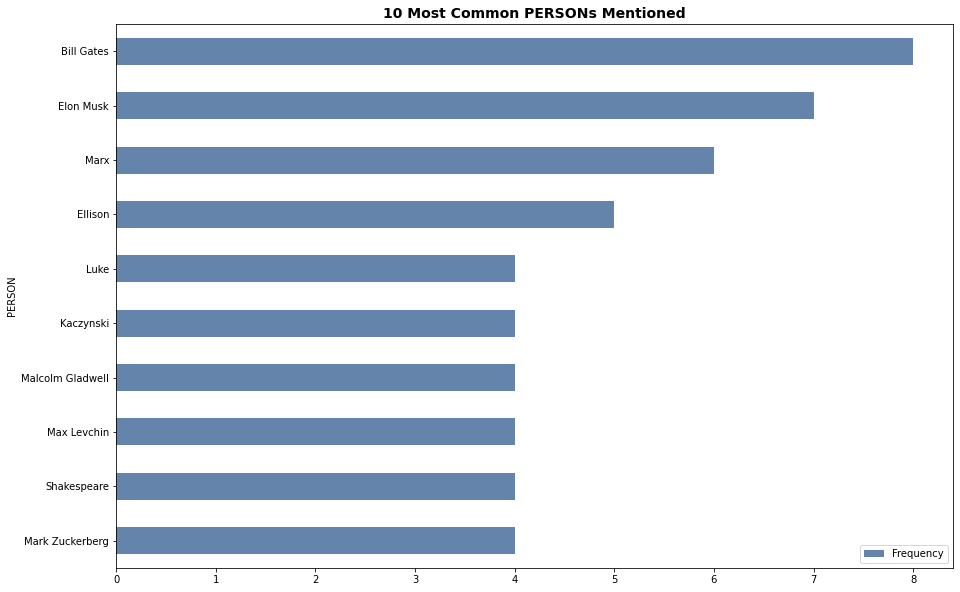

In [19]:
people = []
people_count = []
for i in common_people[1:11]:
    people.append(i[0])
    people_count.append(i[1])

df = pd.DataFrame(
    {'PERSON': people,
     'Frequency': people_count,
    })


fig, ax = plt.subplots(figsize=(15, 10))


ax.locator_params(integer=True)
# Plot horizontal bar graph
df.sort_values(by='Frequency').plot.barh( x ='PERSON',
                      y = 'Frequency',
                      ax = ax,
                      color = '#6484ac')

ax.grid(False)
ax.set_title("10 Most Common PERSONs Mentioned", fontweight = "bold", size = 14)

plt.show(fig)
# fig.savefig('./Top PERSON.png')   # save the figure to file
plt.close(fig)

## Investigate Topic Modeling

In [20]:
corpus = [d.split() for d in lemmatized_words]

In [21]:
# Creating the term dictionary of our courpus, where every unique term is assigned an index
dictionary = corpora.Dictionary(corpus)
# Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(doc1) for doc1 in corpus]

number_of_topics = 7
words = 10

In [22]:
# generate LSA model
lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
print(lsamodel.print_topics(num_topics = number_of_topics, num_words = words))

[(0, '-1.000*"company" + -0.001*"successful" + 0.001*"else" + 0.001*"network" + -0.001*"government" + 0.001*"become" + 0.001*"never" + -0.001*"worked" + -0.001*"goal" + 0.000*"right"'), (1, '1.000*"people" + 0.002*"industry" + 0.002*"want" + 0.002*"ever" + 0.001*"progress" + 0.001*"power" + 0.001*"started" + 0.001*"job" + -0.001*"price" + -0.001*"le"'), (2, '-1.000*"even" + 0.005*"build" + -0.004*"american" + 0.004*"price" + 0.004*"youre" + 0.004*"could" + 0.004*"valuable" + -0.003*"one" + 0.003*"two" + -0.003*"ever"'), (3, '-1.000*"one" + -0.006*"problem" + -0.005*"le" + 0.005*"idea" + 0.005*"human" + -0.004*"look" + -0.004*"valuable" + 0.004*"without" + -0.004*"profit" + 0.004*"progress"'), (4, '-0.999*"business" + -0.036*"world" + 0.006*"sell" + 0.004*"something" + 0.004*"wont" + 0.004*"solar" + -0.004*"doesnt" + -0.003*"find" + -0.003*"plan" + 0.003*"mean"'), (5, '0.999*"world" + -0.036*"business" + 0.008*"right" + -0.006*"whether" + 0.006*"wont" + -0.006*"solar" + 0.005*"cleantech

In [23]:
coherence_values = []
model_list = []
for num_topics in range(2, 12, 1):
    # generate LSA model
    model = LsiModel(doc_term_matrix, num_topics = number_of_topics, id2word = dictionary)  # train model
    model_list.append(model)
    coherencemodel = CoherenceModel(model = model, texts = corpus, dictionary = dictionary, coherence = 'c_v')
    coherence_values.append(coherencemodel.get_coherence())

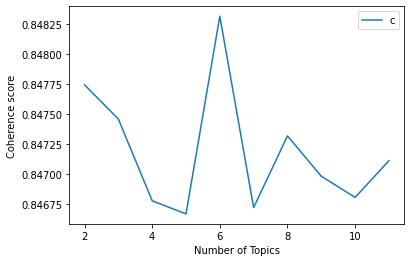

In [24]:
# Show graph
x = range(2, 12, 1)
plt.plot(x, coherence_values)
plt.xlabel("Number of Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc = 'best')
plt.show()

In [27]:
lda_model = gensim.models.LdaMulticore(doc_term_matrix, 
                                   num_topics = 6, 
                                   id2word = dictionary)
lda_model.show_topics()

[(0,
  '0.021*"would" + 0.021*"make" + 0.019*"time" + 0.017*"good" + 0.017*"new" + 0.017*"year" + 0.011*"energy" + 0.011*"sale" + 0.009*"important" + 0.008*"money"'),
 (1,
  '0.060*"company" + 0.024*"future" + 0.018*"product" + 0.016*"way" + 0.013*"computer" + 0.012*"better" + 0.011*"small" + 0.011*"get" + 0.010*"competition" + 0.010*"know"'),
 (2,
  '0.047*"people" + 0.029*"even" + 0.024*"business" + 0.023*"world" + 0.017*"today" + 0.013*"founder" + 0.013*"could" + 0.013*"u" + 0.013*"need" + 0.011*"since"'),
 (3,
  '0.015*"like" + 0.013*"startup" + 0.011*"million" + 0.010*"look" + 0.009*"entrepreneur" + 0.009*"different" + 0.009*"distribution" + 0.008*"build" + 0.008*"take" + 0.007*"everyone"'),
 (4,
  '0.024*"every" + 0.021*"market" + 0.017*"one" + 0.013*"hard" + 0.012*"kind" + 0.011*"human" + 0.009*"first" + 0.008*"car" + 0.008*"sell" + 0.007*"come"'),
 (5,
  '0.021*"work" + 0.018*"one" + 0.018*"thing" + 0.017*"dont" + 0.016*"technology" + 0.016*"question" + 0.014*"secret" + 0.012*"

In [28]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, doc_term_matrix, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.010201  0.138690       1        1  17.703999
2     -0.189975 -0.143609       2        1  16.882175
1      0.087546 -0.171790       3        1  16.559301
4      0.042114  0.059014       4        1  16.490080
5      0.175879 -0.004445       5        1  16.298713
0     -0.125765  0.122141       6        1  16.065733, topic_info=        Term        Freq       Total Category  logprob  loglift
58   company  242.000000  242.000000  Default  30.0000  30.0000
192   people  181.000000  181.000000  Default  29.0000  29.0000
103     even  113.000000  113.000000  Default  28.0000  28.0000
60    future   90.000000   90.000000  Default  27.0000  27.0000
3      every   96.000000   96.000000  Default  26.0000  26.0000
..       ...         ...         ...      ...      ...      ...
48    result   19.566359   26.954947   Topic6  -5.2251   1.5081
242      job   19.432689   33.178053   Topic6  -5.2319   1.2935
93     might   20.081353   49.605225   Topic6  -5.1991   0.9242
318      two   16.418251   25.025713   Topic6  -5.4005   1.4070
744   market   18.044768  108.163199   Topic6  -5.3060   0.0377

[324 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
475       3  0.047449       able
475       5  0.948983       able
1785      2  0.946305  according
45        1  0.896662        act
98        5  0.036051   actually
...     ...       ...        ...
310       6  0.841286       year
298       3  0.918470        yet
1451      2  0.832910      youre
1451      3  0.036213      youre
1451      4  0.144854      youre

[534 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 6, 1])